In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
# Read dataset from the path
df = pd.read_csv('../DeepLearning/dataset/clickbait.csv')
df.head()

,headline,clickbait
0,Should I Get Bings,1
1,Which TV Female Friend Group Do You Belong In,1
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1
3,"This Vine Of New York On ""Celebrity Big Brothe...",1
4,A Couple Did A Stunning Photo Shoot With Their...,1


# Explore Data Analysis

In [109]:
df['Length'] = df.headline.apply(lambda x:len(x)) #Check the length of each text in headline

In [110]:
def describe_data(data_type,data,label):
    print(data_type," DESCRIPTION")
    print("--------------------------")
    size=data.shape
    null_values=data.isnull().sum().sum()
    
    
    print(data_type," shape:",size,"\n") #Print the shape of the data ('How many data', 'Count of features/column')
    print(data_type," contains:",null_values," null values\n")
    print("Label counts:")  
    print(data[label].value_counts()) #see the distribution of the target features
    print()
    
    print("*****",data_type," label count plot ****")
    sns.countplot( 
        data=data,
        x=label
    )

    fig=plt.figure(figsize=(6.5,6))

    sns.kdeplot(
        x=data['Length'],
        hue=data[label]
    )
    plt.show()

Dataset  DESCRIPTION
--------------------------
Dataset  shape: (32000, 3) 

Dataset  contains: 0  null values

Label counts:
0    16001
1    15999
Name: clickbait, dtype: int64

***** Dataset  label count plot ****


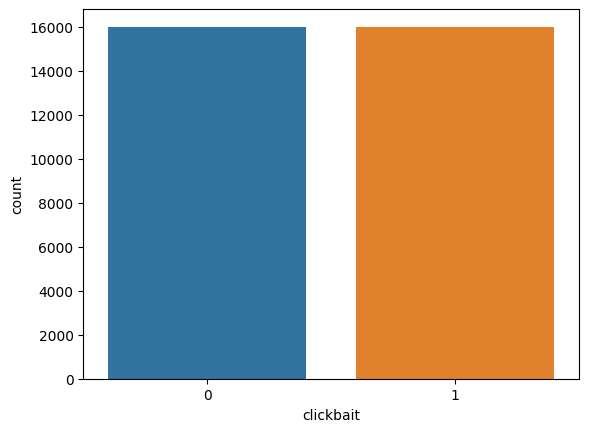

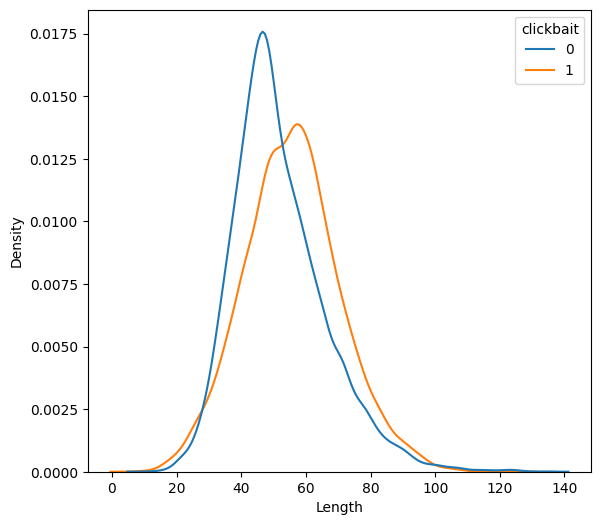

In [111]:
describe_data('Dataset', df, 'clickbait')

In [112]:
#See the Quartile of the length
#This is important, especially the 75% of length, this 75% will be used as the maxlen in the Tokenization
df.Length.describe()

count    32000.000000
mean        53.797063
std         14.771455
min          6.000000
25%         44.000000
50%         52.000000
75%         63.000000
max        135.000000
Name: Length, dtype: float64

# Text Preprocessing

In [113]:
import re
# %pip install nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import tensorflow as tf
import random
SEED = 100
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

[nltk_data] Downloading package punkt to C:\Users\Stevanus-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Stevanus-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Stevanus-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [114]:
def preprocess_text(text):
    # Lowercasing ('HalO' => 'halo')
    text = text.lower()
    
    # Removing Punctuation ('halo.' => 'halo')
    text = re.sub(r'[^\w\s]', '', text)
    
    # Tokenization 
    words = word_tokenize(text)
    
    # Removing Stop Words ('remove unnecesary words that does not add any meaning to the text')
    stop_words = set(stopwords.words("english"))
    words = [word for word in words if word not in stop_words]
    
    # Lemmatization (return a basic form of the word, 'go' and 'went' has the same value, so it saved computational to translate the 'went' to 'go')
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Removing Numbers ('This is my 18th birthday' => 'This is my th birthday')
    words = [word for word in words if not word.isdigit()]
    
    return " ".join(words)


In [115]:
df['clean_headline'] = df['headline'].apply(preprocess_text) #do the preprocessing
df['clean_Length'] = df['clean_headline'].apply(lambda x:len(x))  #get the length of each text after preprocessing

Dataset  DESCRIPTION
--------------------------
Dataset  shape: (32000, 5) 

Dataset  contains: 0  null values

Label counts:
0    16001
1    15999
Name: clickbait, dtype: int64

***** Dataset  label count plot ****


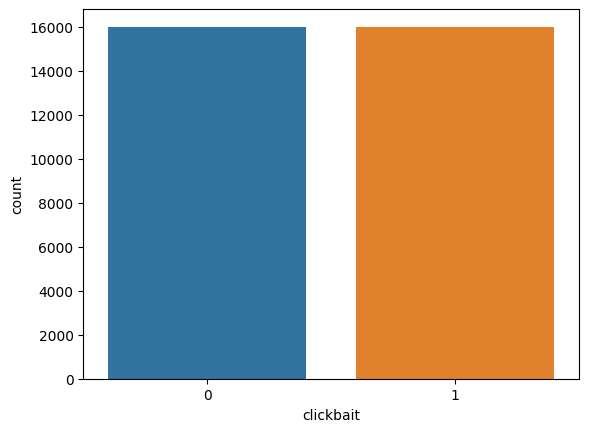

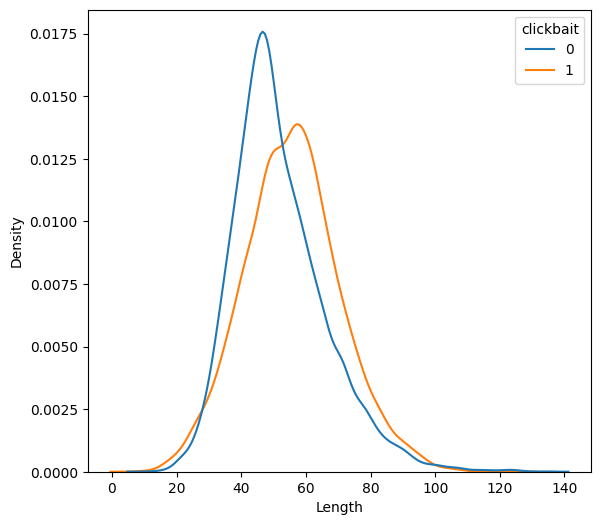

In [116]:
describe_data("Dataset", df, 'clickbait')

In [117]:
df['clean_Length'].describe() #the min is 0.00, lets take a look.

count    32000.000000
mean        40.146375
std         13.170713
min          0.000000
25%         31.000000
50%         39.000000
75%         48.000000
max        121.000000
Name: clean_Length, dtype: float64

In [118]:
df.head(5)

,headline,clickbait,Length,clean_headline,clean_Length
0,Should I Get Bings,1,18,get bings,9
1,Which TV Female Friend Group Do You Belong In,1,45,tv female friend group belong,29
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1,73,new star war force awakens trailer give chill,45
3,"This Vine Of New York On ""Celebrity Big Brothe...",1,67,vine new york celebrity big brother fucking pe...,51
4,A Couple Did A Stunning Photo Shoot With Their...,1,100,couple stunning photo shoot baby learning inop...,64


In [119]:
df = df[df['clean_Length'] > 0] #get all the text thas length is not 0

Dataset  DESCRIPTION
--------------------------
Dataset  shape: (31998, 5) 

Dataset  contains: 0  null values

Label counts:
0    16001
1    15997
Name: clickbait, dtype: int64

***** Dataset  label count plot ****


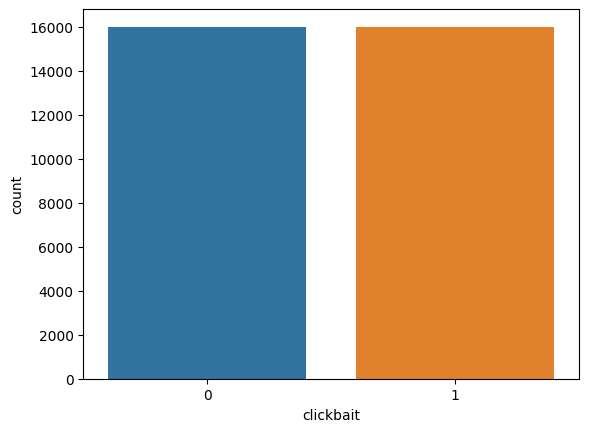

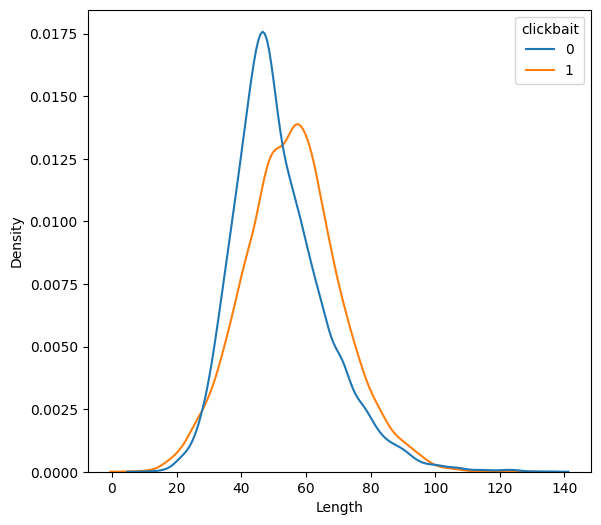

In [120]:
describe_data("Dataset", df, 'clickbait')

In [121]:
df['clean_Length'].describe()

count    31998.000000
mean        40.148884
std         13.167300
min          3.000000
25%         31.000000
50%         39.000000
75%         48.000000
max        121.000000
Name: clean_Length, dtype: float64

# Train, Test, Val Split and Tokenizer

In [122]:
from sklearn.model_selection import train_test_split

train_df, temp_df = train_test_split(df, test_size=0.2, stratify=df['clickbait'], random_state=SEED) #stratify memastikan bahwa distribusi dari target feature/column setara pada train, test, dan val
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['clickbait'], random_state=SEED)

In [123]:
train_df['clickbait'].value_counts()

0    12801
1    12797
Name: clickbait, dtype: int64

In [124]:
val_df['clickbait'].value_counts()

1    1600
0    1600
Name: clickbait, dtype: int64

In [125]:
test_df['clickbait'].value_counts()

1    1600
0    1600
Name: clickbait, dtype: int64

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Initialize Tokenizer
# Panggil kelas Tokenizer dari tensorflow dan set jumlah dictionary of word yang diterima sebanyak 10000 dan pasang OOV token
# OOV token ini berguna saat ada teks yang tidak ada didalam dictionary of word, sehingga teks tersebut akan diganti dengan OOV token.
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>") 

# Fit on training data
# fit_on_texts, adalah sebuah proses pengubahan teks menjadi token (1, 2, 3, etc), token ini nanti akan disimpan dalam dictionary 
# dalam bentuk "Key":value dengan Key adalah string dari kata dan value adalah tokennya, dalam kasus ini digunakan data latih untuk dibuat dictionary of word
tokenizer.fit_on_texts(train_df['clean_headline'].values)

vocab_size = len(tokenizer.word_index) + 1 # print jumlah dari dictionary of word
print(vocab_size)

In [127]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Convert text data to numerical sequences
#  Rubah tiap kata dalam kalimat menjadi token, jika kata tidak ada didalam dictionary of word maka akan diisi oleh OOV token.
train_sequences = tokenizer.texts_to_sequences(train_df['clean_headline'].values)
val_sequences = tokenizer.texts_to_sequences(val_df['clean_headline'].values)
test_sequences = tokenizer.texts_to_sequences(test_df['clean_headline'].values)

# Padding sequences to a fixed length
MAX_LENGTH = 100 #from EDA i know that max length is 121 and 75% of text is at 48, so 100 is a reasonably choice between 121 and 48
# Padding disini berguna untuk menyetarakan jumlah input dengan maxlen, jika jumlah input tidak sesuai maka diawal (padding='post') akan diisi oleh integer 0
train_padded = pad_sequences(train_sequences, maxlen=MAX_LENGTH, padding='post')
val_padded = pad_sequences(val_sequences, maxlen=MAX_LENGTH, padding='post')
test_padded = pad_sequences(test_sequences, maxlen=MAX_LENGTH, padding='post')


# Model Building (Bidirectional RNN)

In [128]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, BatchNormalization

In [132]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=100, input_length=100),
    BatchNormalization(), #normalisasi input
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.2),
    Bidirectional(LSTM(32)),
    Dropout(0.2),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.2),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 100, 100)          1900400   
                                                                 
 batch_normalization_11 (Bat  (None, 100, 100)         400       
 chNormalization)                                                
                                                                 
 bidirectional_19 (Bidirecti  (None, 100, 128)         84480     
 onal)                                                           
                                                                 
 dropout_24 (Dropout)        (None, 100, 128)          0         
                                                                 
 bidirectional_20 (Bidirecti  (None, 64)               41216     
 onal)                                                           
                                                      

In [133]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, Callback

early_stop = EarlyStopping(monitor='val_loss', patience=1)

model_checkpoint = ModelCheckpoint(filepath='../DeepLearning/saved_model/BiLSTM_Model.h5', save_best_only=True, 
                                   save_weights_only=True, monitor='val_loss', mode='min')

reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=1, verbose=1, factor=0.5)

class StopOnThreshold(Callback):
    def __init__(self, threshold=0.9):
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') >= self.threshold and logs.get('val_accuracy') >= self.threshold:
            print(f'\nAccuracy and Validation Accuracy have reached the threshold of {self.threshold}. Stopping training.')
            self.model.stop_training = True

stop_train = StopOnThreshold(threshold=0.9)

callbacks = [early_stop, model_checkpoint, reduce_lr, stop_train]



In [135]:
model.fit(train_padded, train_df['clickbait'], epochs=10, batch_size=64, validation_data=(val_padded, val_df['clickbait']), callbacks=callbacks)

Epoch 1/10
400/400 [==============================] - ETA: 0s - loss: 0.6004 - accuracy: 0.9126
Accuracy and Validation Accuracy have reached the threshold of 0.9. Stopping training.
400/400 [==============================] - 48s 114ms/step - loss: 0.6004 - accuracy: 0.9126 - val_loss: 0.4271 - val_accuracy: 0.9350 - lr: 0.0010


# Evaluate

In [136]:
from sklearn.metrics import classification_report

In [157]:
y_pred = model.predict(test_padded)
y_pred = np.round(y_pred)
y_pred = y_pred.flatten().astype(int)
y_pred

100/100 [==============================] - 2s 21ms/step


array([1, 0, 1, ..., 1, 1, 1])

In [160]:
# Generate the classification report
print(classification_report(test_df['clickbait'].values, y_pred, target_names=['Not ClickBait', 'ClickBait']))


               precision    recall  f1-score   support

Not ClickBait       0.99      0.89      0.93      1600
    ClickBait       0.90      0.99      0.94      1600

     accuracy                           0.94      3200
    macro avg       0.94      0.94      0.94      3200
 weighted avg       0.94      0.94      0.94      3200



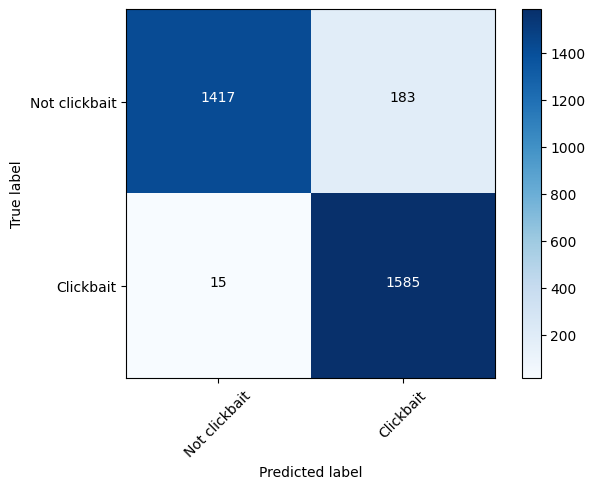

In [159]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Calculate the confusion matrix
cm = confusion_matrix(y_true=test_df['clickbait'], y_pred=y_pred)

# Plot the confusion matrix as a heatmap
plt.figure()
plt.imshow(cm, cmap='Blues')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Not clickbait', 'Clickbait'], rotation=45)
plt.yticks(tick_marks, ['Not clickbait', 'Clickbait'])

# Add labels and formatting to the plot
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [164]:
import pickle

with open('../DeepLearning/saved_model/BiLSTM_tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [161]:
def predict_clickbait(model, text, tokenizer):
    # Preprocessing the input text
    text = [text]
    sequences = tokenizer.texts_to_sequences(text)
    sequences = pad_sequences(sequences, maxlen=100)
    
    # Make prediction
    prediction = model.predict(sequences)
    prediction = np.round(prediction[0][0])
    
    # Map prediction to class labels
    if prediction == 0:
        return "Not Clickbait"
    else:
        return "Clickbait"


In [ ]:
# from tensorflow.keras.models import load_model


# model = load_model('../DeepLearning/saved_model/BiLSTM_Model.h5')

# with open('../DeepLearning/saved_model/BiLSTM_tokenizer.pickle', 'rb') as handle:
#     tokenizer = pickle.load(handle)

In [162]:
test = 'Which TV Female Friend Group Do You Belong In'
predict_clickbait(model, test, tokenizer)

1/1 [==============================] - 1s 730ms/step


'Clickbait'